(HW4)=
# HW4

## Task 4.1 (0.5 points)

A bridge player had no ace in three consecutive hands. What is the probability of this event? Did he have reason to complain of ill luck? A hand consists of $13$ random cards drawn out of $52$.

### MY SOLUTION:

$$\text{Total number of ways to draw 13 cards from 52 is } C(52, 13)$$

$$\text{Total number of ways to draw 13 cards from 52 where none of them are aces } C(48, 13)$$

$$\text{Probability of not getting an ace in a single hand is the ratio of them two } P(\text{no aces})=\frac{C(48, 13)}{C(52, 13)} $$

$$\text{Since player won't have any aces ion three consecutive hands .\\ We need to multiply itself the probability of getting no ace in a hand 3 times }$$

$$P(\text{no aces in a consecutive 3 hands})=P(\text{no aces})^3=(\frac{C(48, 13)}{C(52, 13)})^3$$

$$\text{Python calculations is below}$$



In [2]:
from scipy.special import comb
import math
noAcesForHand = comb(48, 13, exact=True)
allCombinations = comb(52, 13, exact=True) 
p = noAcesForHand/allCombinations ## no aces for one hand
p3 = math.pow(p, 3)
p3

0.028043904088925098

## Task 4.2 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### THEORETICAL PART:

Your historgram for a paticular value of $N$ should look like this:



$$\text{There is some number } x_k \text{, it means that k-1 numbers are less than x}$$

$$\text{Probability that exactly } k-1 \text{ numbers are less than } x \text{ is the probability of k-1 true in n-1 trials (because 1 trial is the exact value of x), with true probability x is:}$$

$$ \binom{n-1}{k-1}\left[x^{k-1}(1-x)^{(n-1)-(k-1)}\right] $$

$$\text{Probability of true is x, because distribution is uniform, the probability } x \in [0,1])$$

$$\text{PDF of the k-th order statistic }f_k(x) \text{ is}$$

$$ f_k(x) = n\binom{n-1}{k-1}x^{k-1}(1-x)^{n-k} $$

$$\text{The PDF simplifies to:}$$

$$ f_k(x) = \frac{n!}{(k-1)!(n-k)!}\left[x^{k-1}(1-x)^{n-k}\right]$$

$\mathrm{Beta}(k, n+1-k)$:

$$ \frac{x^{k-1}(1-x)^{n+1-k-1}}{B(k, n+1-k)} $$

$$\text{Using the properties of the Gamma function, the Beta function can also be expressed in terms of the Gamma function: }$$

$$ B(\alpha, \beta) = \frac{Г(\alpha)Г(\beta)}{Г(\alpha+\beta)} $$

$Г(n) = (n-1)!$

$$ B(\alpha, \beta) = \frac{(\alpha-1)!(\beta-1)!}{(\alpha+\beta-1)!} $$


$$\text{So } B(k, n+1-k) = \frac{(k-1)!(n-k)!}{n!} $$

$$ \mathrm{Beta}(k, n+1-k) = \frac{x^{k-1}(1-x)^{n-k}n!}{(k-1)!(n-k)!} = f_k(x) = \frac{n!}{(k-1)!(n-k)!}x^{k-1}(1-x)^{n-k} $$

$$\text{PDF matches the form Beta distribution, } \alpha = k \text{ and } \beta = n-k+1 \text{ showing us that the k-th order statistic from a uniform distibution on [0,1] is distributed as }\mathrm{Beta}(k, n+1 -k)$$


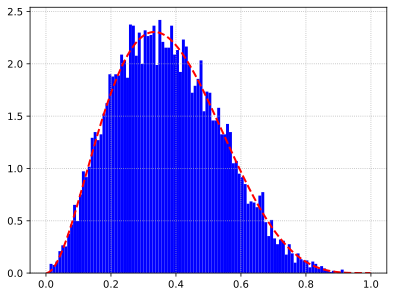

In [8]:

from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

#%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

### EXPERIMENTAL PART:

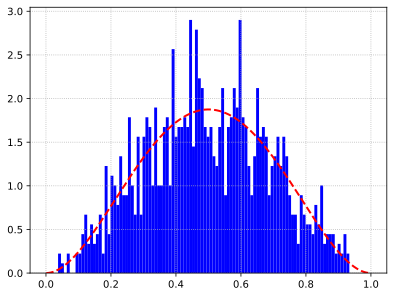

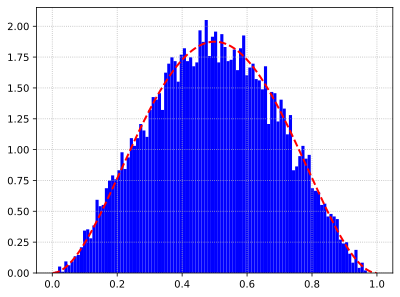

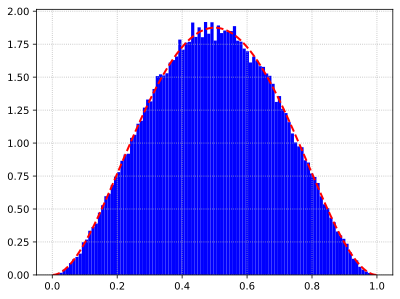

In [7]:
#%config InlineBackend.figure_formats = ['svg']

def beta_hist(k, n, N):
    X = np.random.uniform(0, 1, (N, n))
    
    X_sorted = np.sort(X, axis=1)
    X_kth = X_sorted[:, k-1]
    
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(X_kth, bins=100, color='b', density=True)
    plt.plot(xs, beta(k, n+1-k).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    plt.show()

for N in [1000, 10000, 100000]:
    beta_hist(3, 5, N)

## Task 4.3 (1 point)

Calculate entropy of $\mathcal N(\mu, \sigma^2)$. Plot the graph of this entropy as function of $\sigma$. What is the limit of this function as $\sigma \to +0$? $\sigma \to +\infty$?


### MY SOLUTION:


$$\text{If we will use the entropy of Gaussian Distribution }\mathcal{N}(\mu, \sigma^2) \text{ by this formula is } H(X)=1/2\ln(\pi e \sigma^2)$$

$$\text{Since } \sigma \to +\infty, \text{ Then } \mathcal{N} \to +\infty  $$

$$\text{Since } \sigma \to +0, \text{ Then } \mathcal{N} \to -\infty  $$

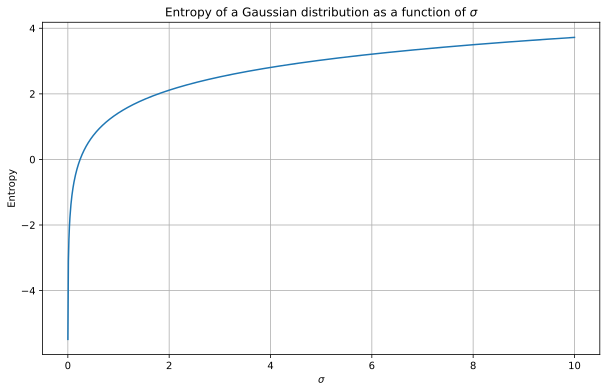

In [5]:
%config InlineBackend.figure_formats = ['svg']

def entropy(sigma):
    return 0.5 * np.log(2 * np.pi * np.e * sigma**2)

sigma_values = np.linspace(0.001, 10, 1000)

entropy_values = entropy(sigma_values)

plt.figure(figsize=(10, 6))
plt.plot(sigma_values, entropy_values)
plt.title('Entropy of a Gaussian distribution as a function of $\\sigma$')
plt.xlabel('$\\sigma $')
plt.ylabel('Entropy')
plt.grid(True)



## Task 4.4 (1 point)

Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$.

### MY SOLUTION:

$$
\text{General KL divergence Q distribution to P distribution is } D_{KL}(P||Q) = \sum_{x \in X} P(x) \log \left(\frac{P(x)}{Q(x)}\right )
$$

$$
\text{Geometric distribution is } P(k; s) = (1-s)^{k-1}s \text{ and } Q(k; t) = (1-t)^{k-1}t
$$

$$
\text{Substituting these into the KL divergence formula gives } D_{KL}(P||Q) = \sum_{k=1}^{\infty} P(k; s) \log \left(\frac{P(k; s)}{Q(k; t)}\right)
$$

$$
\text{Simplified form: } D_{KL}(P||Q) = \sum_{k=1}^{\infty} (1-s)^{k-1}s \log \left(\frac{(1-s)^{k-1}s}{(1-t)^{k-1}t}\right)
$$

$$
D_{KL}(P||Q) = \sum_{k=1}^{\infty} (1-s)^{k-1}s \left[ \log \left(\frac{(1-s)^{k-1}}{(1-t)^{k-1}}\right) - \log \left(\frac{s}{t}\right) \right]
$$

$$
\text{So we can notice that if s=t it means that their divergence is equal to 0 }
$$ 

$$
\text{Let's see } \mathbb{KL}(Q||P) - D_{KL}(Q||P) = \sum_{k=1}^{\infty} (1-t)^{k-1}t \left[ \log \left(\frac{(1-t)^{k-1}}{(1-s)^{k-1}}\right) - \log \left(\frac{t}{s}\right) \right]
$$

$$
\text{Equality } \mathbb{KL}(P, Q) = \mathbb{KL}(Q, P) \text{ is not
 holding}  
$$


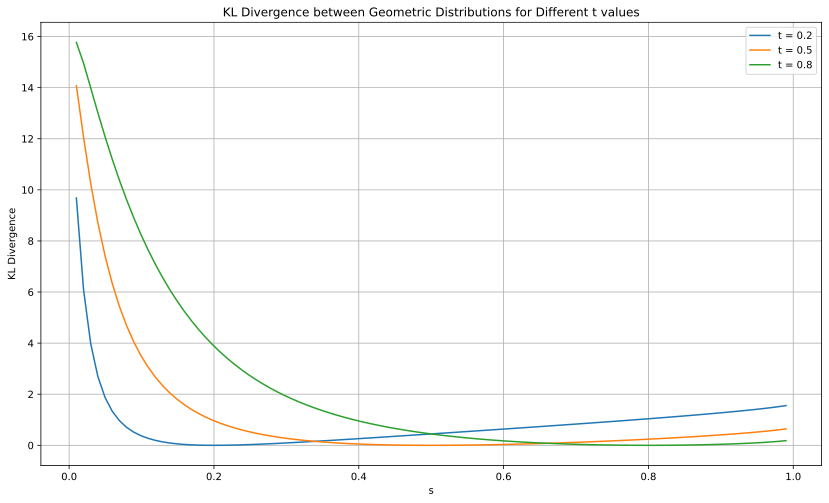

In [6]:
#%config InlineBackend.figure_formats = ['svg']
from scipy.stats import geom

def kl_divergence(s, t):
    p = geom(p=s)
    q = geom(p=t)
    k = np.arange(1, 1000)  
    pk = p.pmf(k)
    qk = q.pmf(k)
    pk[pk < 1e-10] = 1e-10
    qk[qk < 1e-10] = 1e-10
    kl = np.sum(pk * np.log(pk / qk))
    return kl

t_values = [0.2, 0.5, 0.8]

s_values = np.linspace(0.01, 0.99, 100)

kl_values = []
for t in t_values:
    kl_t = [kl_divergence(s, t) for s in s_values]
    kl_values.append(kl_t)

plt.figure(figsize=(14, 8))
for i, t in enumerate(t_values):
    plt.plot(s_values, kl_values[i], label=f't = {t}')

plt.title('KL Divergence between Geometric Distributions for Different t values')
plt.xlabel('s')
plt.ylabel('KL Divergence')
plt.legend()
plt.grid(True)
plt.show()
